In [1]:
import keras
import matplotlib.pyplot as pyplot
import numpy
from keras import datasets, layers
from keras import regularizers

In [2]:
encoding_dim = 16
hidden_activation = 'relu'
optimizer = 'rmsprop'
loss = 'binary_crossentropy'
learning_rate = 0.01
max_epochs = 50
batch_size = 2048

# VANILLA AUTOENCODER

In [3]:
# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation=hidden_activation)(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [4]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [5]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [6]:
match optimizer:
    case 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    case 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    case 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

In [7]:
autoencoder.compile(optimizer=opt, loss=loss)

In [8]:
(x_train, _), (x_test, _) = datasets.mnist.load_data()

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), numpy.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), numpy.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
autoencoder.fit(x_train, x_train,
                epochs=max_epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.4179 - val_loss: 0.2536
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.2404 - val_loss: 0.2081
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.2041 - val_loss: 0.1894
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.1883 - val_loss: 0.1784
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.1788 - val_loss: 0.1711
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.1720 - val_loss: 0.1669
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.1678 - val_loss: 0.1658
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.1654 - val_loss: 0.1631
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.1636 - val_loss: 0.1633
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.1617 - val_loss: 0.1600
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.1607 - val_loss: 0.1596
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.1

In [11]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


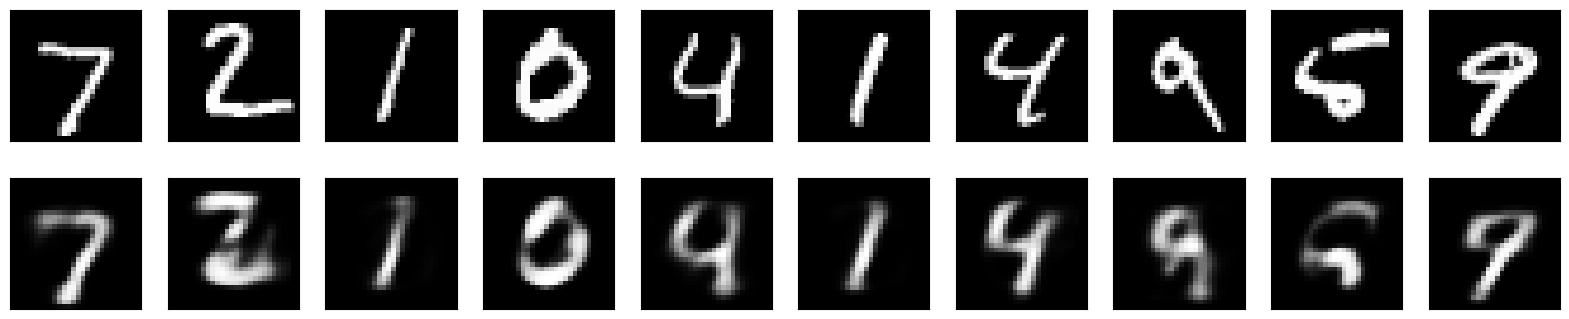

In [12]:
n = 10  # How many digits we will display
pyplot.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

# SPARSE AUTOENCODER

In [13]:
input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation=hidden_activation,
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [14]:
match optimizer:
    case 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    case 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    case 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

In [15]:
autoencoder.compile(optimizer=opt, loss=loss)

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=max_epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.7348 - val_loss: 0.5964
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.5788 - val_loss: 0.5306
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.5166 - val_loss: 0.4783
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.4671 - val_loss: 0.4370
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.4283 - val_loss: 0.4049
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.3981 - val_loss: 0.3800
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.3746 - val_loss: 0.3606
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.3565 - val_loss: 0.3456
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.3421 - val_loss: 0.3337
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.3310 - val_loss: 0.3243
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.3221 - val_loss: 0.3167
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.3

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step


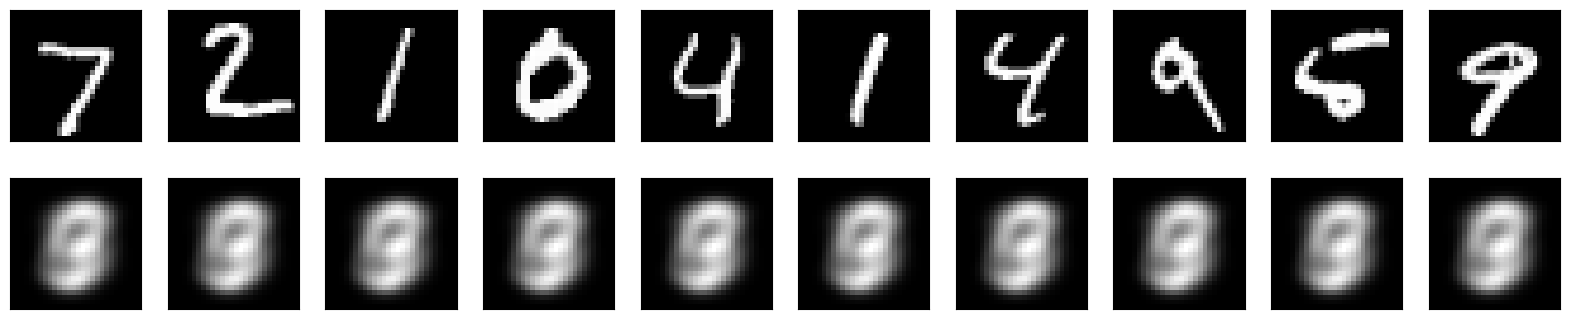

In [17]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # How many digits we will display
pyplot.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

# DEEP AUTOENCODER

In [18]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(4*encoding_dim, activation=hidden_activation)(input_img)
encoded = layers.Dense(2*encoding_dim, activation=hidden_activation)(encoded)
encoded = layers.Dense(encoding_dim, activation=hidden_activation)(encoded)
decoded = layers.Dense(2*encoding_dim, activation=hidden_activation)(encoded)
decoded = layers.Dense(4*encoding_dim, activation=hidden_activation)(decoded)
decoded = layers.Dense(784, activation=hidden_activation)(decoded)

In [19]:
match optimizer:
    case 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    case 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    case 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

In [20]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer=opt, loss=loss)

autoencoder.fit(x_train, x_train,
                epochs=max_epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.7868 - val_loss: 0.3859
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.3635 - val_loss: 0.3317
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.3270 - val_loss: 0.3128
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.3121 - val_loss: 0.2913
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.2953 - val_loss: 0.2859
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.2821 - val_loss: 0.3033
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.2639 - val_loss: 0.2465
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.2461 - val_loss: 0.3128
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.2531 - val_loss: 0.2495
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.2443 - val_loss: 0.2281
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.2334 - val_loss: 0.2237
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


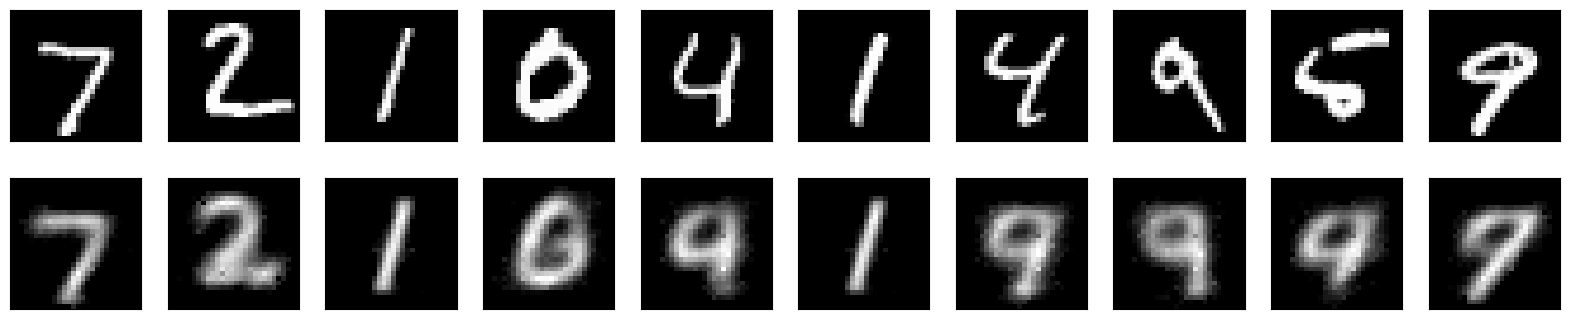

In [21]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # How many digits we will display
pyplot.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

# CONVOLUTIONAL AUTOENCODER

In [22]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(4*encoding_dim, (3, 3), activation=hidden_activation, padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(2*encoding_dim, (3, 3), activation=hidden_activation, padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(encoding_dim, (3, 3), activation=hidden_activation, padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(encoding_dim, (3, 3), activation=hidden_activation, padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(2*encoding_dim, (3, 3), activation=hidden_activation, padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(4*encoding_dim, (3, 3), activation=hidden_activation)(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)


In [23]:
match optimizer:
    case 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    case 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    case 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

In [24]:
autoencoder.compile(optimizer=opt, loss=loss)

In [25]:
(x_train, _), (x_test, _) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = numpy.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = numpy.reshape(x_test, (len(x_test), 28, 28, 1))

In [26]:
autoencoder.fit(x_train, x_train,
                epochs=max_epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test),)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - loss: 7.2764 - val_loss: 0.2601
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - loss: 0.2560 - val_loss: 0.2225
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - loss: 0.2373 - val_loss: 0.2225
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - loss: 0.2231 - val_loss: 0.1932
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - loss: 0.2054 - val_loss: 0.2639
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - loss: 0.1984 - val_loss: 0.1865
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - loss: 0.1825 - val_loss: 0.1846
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - loss: 0.1709 - val_loss: 0.1622
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - loss: 0.1624 - val_loss: 0.1500
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - loss: 0.1590 - val_loss: 0.1563
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - loss: 0.1511 - val_loss: 0.1492
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - loss: 0.1479 - val_lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


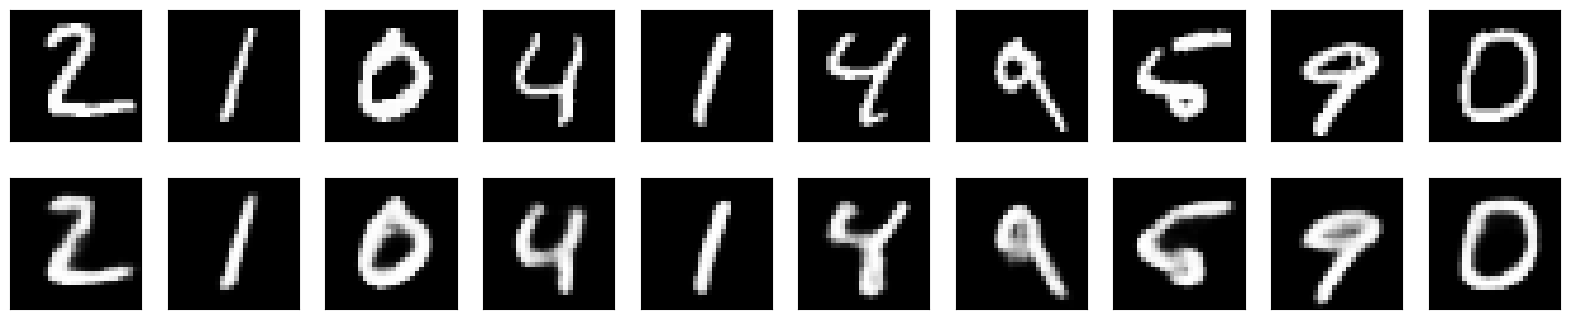

In [27]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
pyplot.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = pyplot.subplot(2, n, i)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


ValueError: cannot reshape array of size 256 into shape (4,32)

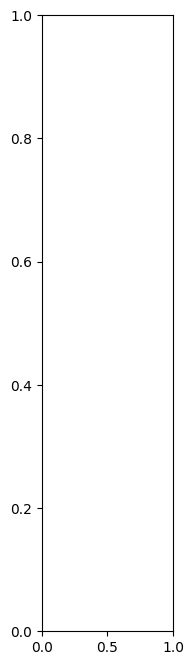

In [28]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
pyplot.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = pyplot.subplot(1, n, i)
    pyplot.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

# DENOISING AUTOENCODER

In [29]:
(x_train, _), (x_test, _) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = numpy.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = numpy.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

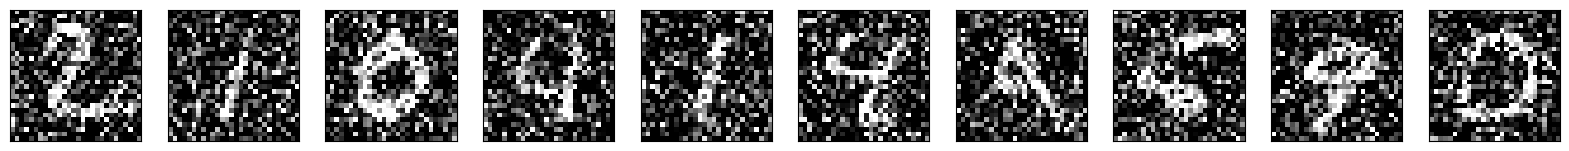

In [30]:
n = 10
pyplot.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = pyplot.subplot(1, n, i)
    pyplot.imshow(x_test_noisy[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [31]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(encoding_dim, (3, 3), activation=hidden_activation, padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(encoding_dim, (3, 3), activation=hidden_activation, padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(encoding_dim, (3, 3), activation=hidden_activation, padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(encoding_dim, (3, 3), activation=hidden_activation, padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

In [32]:
match optimizer:
    case 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    case 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    case 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

In [33]:
autoencoder.compile(optimizer=opt, loss=loss)

In [34]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=max_epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 806ms/step - loss: 0.9235 - val_loss: 0.3083
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 751ms/step - loss: 0.3859 - val_loss: 0.2398
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 770ms/step - loss: 0.2116 - val_loss: 0.1829
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 782ms/step - loss: 0.1769 - val_loss: 0.1572
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 782ms/step - loss: 0.1558 - val_loss: 0.1418
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 758ms/step - loss: 0.1444 - val_loss: 0.1317
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 762ms/step - loss: 0.1366 - val_loss: 0.1283
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 748ms/step - loss: 0.1326 - val_loss: 0.1252
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 767ms/step - loss: 0.1295 - val_loss: 0.1276
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 794ms/step - loss: 0.1273 - val_loss: 0.1217
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 801ms/step - loss: 0.1261 - val_loss: 0.1183
Epoch 12/100
30/30 ━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


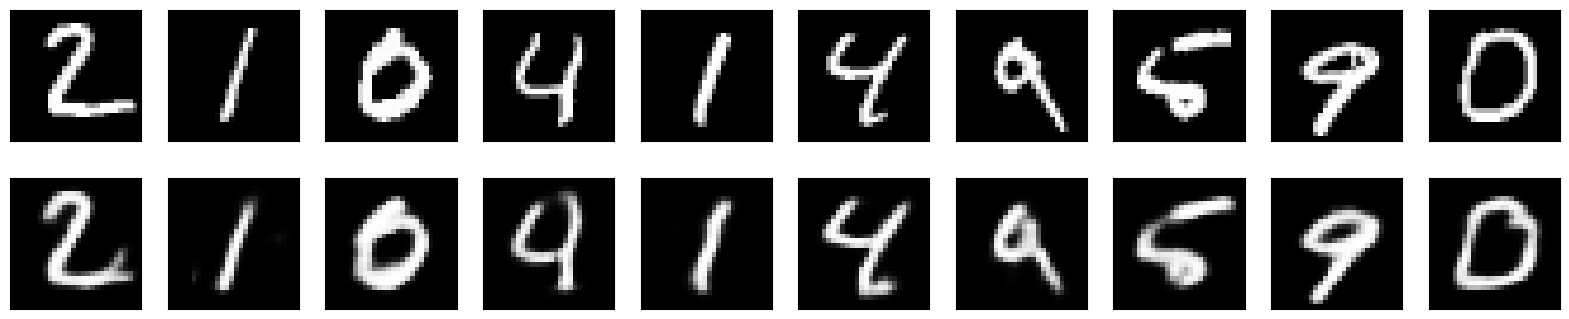

In [35]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
pyplot.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = pyplot.subplot(2, n, i)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

# VARIATIONAL AUTOENCODER

In [36]:
original_dim = 28 * 28
intermediate_dim = 4*encoding_dim
latent_dim = encoding_dim

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation=hidden_activation)(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [37]:
from keras import backend as K
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

NotImplementedError: Exception encountered when calling Lambda.call().

[1mWe could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.[0m

Arguments received by Lambda.call():
  • args=(['<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_41>', '<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_42>'],)
  • kwargs={'mask': ['None', 'None']}

In [55]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation=hidden_activation)(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [ ]:
match optimizer:
    case 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    case 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    case 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

In [56]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=opt)

In [57]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), numpy.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), numpy.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=max_epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 186.3466 - val_loss: 167.2723
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 165.1634 - val_loss: 163.4292
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 162.2681 - val_loss: 161.1340
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 160.2209 - val_loss: 159.4255
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 158.6438 - val_loss: 157.9564
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 157.3516 - val_loss: 157.0014
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 156.3163 - val_loss: 155.9475
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 155.4188 - val_loss: 155.3367
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 154.5471 - val_loss: 154.4764
Epoch 10/100
1875/1875 [=============

In [58]:
x_test_encoded = encoder.predict(x_test, batch_size=256)
pyplot.figure(figsize=(6, 6))
pyplot.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
pyplot.colorbar()
pyplot.show()

40/40 [==============================] - 0s 3ms/step


TypeError: list indices must be integers or slices, not tuple

<Figure size 600x600 with 0 Axes>

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = numpy.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = numpy.linspace(-15, 15, n)
grid_y = numpy.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = numpy.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

pyplot.figure(figsize=(10, 10))
pyplot.imshow(figure)
pyplot.show()